In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
corr = heart.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
chol,0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
fbs,0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
restecg,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
thalach,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


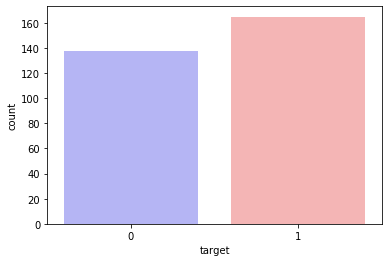

In [4]:
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

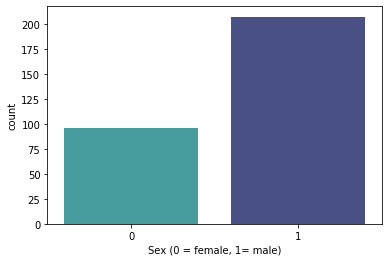

In [5]:
sns.countplot(x='sex', data=heart, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

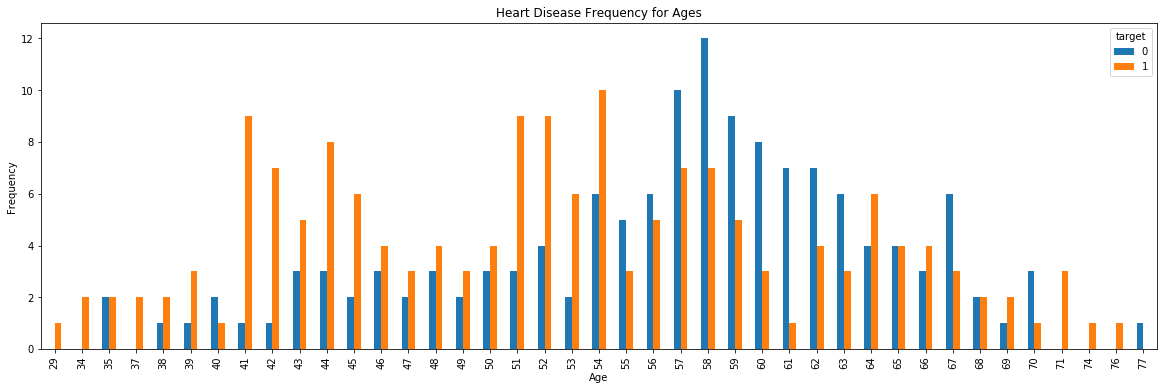

In [6]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

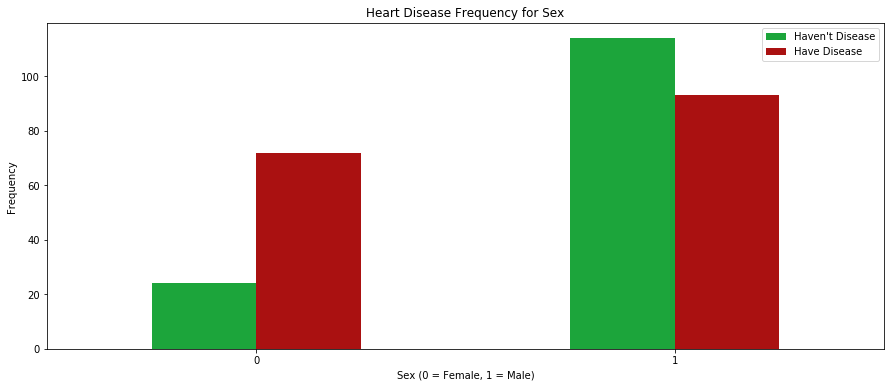

In [7]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [8]:
X = heart.iloc[:,:-1].values
Y = heart.iloc[:,-1].values
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
#DecisionTreeClassifier
clf_tree = DecisionTreeClassifier( random_state = 0, max_depth = 3, min_samples_leaf = 3)
clf_tree.fit(X_train, y_train)
y_pred_en = clf_tree.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred_en)*100)

Accuracy score :  81.9672131147541


In [11]:
##Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear',C=1, random_state=0)
model.fit(X_train, y_train)
model.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, model.predict(X_test))*100)

Accuracy score :  83.60655737704919


In [12]:

#Create a svc Classifier
clf_SVC = SVC() 

#Train the model using the training sets
clf_SVC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_SVC.predict(X_test)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8688524590163934


In [13]:

#Create a Gaussian Classifier
clf_RF=RandomForestClassifier(n_estimators=100, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train,y_train)

y_pred=clf_RF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8688524590163934


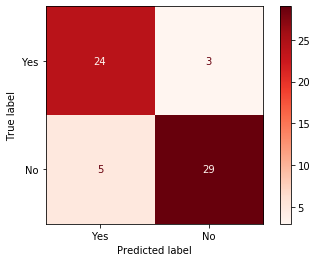

In [14]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf_RF, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Reds)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=1, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))


Accuracy: 0.8688524590163934


In [16]:
from xgboost import XGBClassifier
model_XG = XGBClassifier(learning_rate =0.001,n_estimators=10000,max_depth=None,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model_XG.fit(X_train,y_train)
y_pred = model_XG.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8524590163934426


In [18]:
from catboost import CatBoostClassifier
model_CB = CatBoostClassifier(iterations=150,
                          learning_rate=0.3,
                          depth=4)
# Fit model
model_CB.fit(X_train, y_train)
# Get predictions
preds = model_CB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, preds))


0:	learn: 0.6152765	total: 60.1ms	remaining: 8.96s
1:	learn: 0.5489360	total: 61.3ms	remaining: 4.54s
2:	learn: 0.5075472	total: 63.6ms	remaining: 3.12s
3:	learn: 0.4666107	total: 65.7ms	remaining: 2.4s
4:	learn: 0.4469870	total: 66.7ms	remaining: 1.93s
5:	learn: 0.4187505	total: 68.7ms	remaining: 1.65s
6:	learn: 0.3985335	total: 70ms	remaining: 1.43s
7:	learn: 0.3799833	total: 72ms	remaining: 1.28s
8:	learn: 0.3730049	total: 73.2ms	remaining: 1.15s
9:	learn: 0.3604503	total: 75.1ms	remaining: 1.05s
10:	learn: 0.3529093	total: 76.2ms	remaining: 963ms
11:	learn: 0.3479766	total: 77.7ms	remaining: 893ms
12:	learn: 0.3366171	total: 81.2ms	remaining: 856ms
13:	learn: 0.3273252	total: 82.6ms	remaining: 802ms
14:	learn: 0.3233772	total: 83.8ms	remaining: 754ms
15:	learn: 0.3185368	total: 85.2ms	remaining: 714ms
16:	learn: 0.3139671	total: 86.4ms	remaining: 676ms
17:	learn: 0.3093353	total: 87.8ms	remaining: 644ms
18:	learn: 0.3053465	total: 89.2ms	remaining: 615ms
19:	learn: 0.2982197	total:

In [19]:
XGB_CLF = XGBClassifier()
XGB_CLF.fit(X_train,y_train)
preds = XGB_CLF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.7868852459016393
